<a href="https://colab.research.google.com/github/ihagoSantos/image-analysis-and-computer-vision/blob/main/cats_and_dogs_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# check whether GPU is provided
!nvcc --version
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0
Tue Mar 11 22:53:45 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8       

# Download Dataset

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O cats_and_dogs_filtered.zip

--2025-03-11 22:53:53--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.207, 142.250.107.207, 142.251.188.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   250MB/s    in 0.3s    

2025-03-11 22:53:54 (250 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

local_zip = 'cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('data/')
zip_ref.close()

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = 'data/cats_and_dogs_filtered/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')


# Building our Network

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras import optimizers

# compile the model
model.compile(
    loss="binary_crossentropy",
    optimizer = optimizers.RMSprop(learning_rate=1e-4),
    metrics=['acc']
)

# Data preprocessing

Devemos convertor os dados em tensores de ponto flutuante. Devemos seguir as seguintes etapas:
1. Leia os arquivos de imagem
2. Decodifique em pixels RGB
3. Converta-os em tensores de ponto flutuante
4. Reescale cada pixel de (0 a 255) para [0, 1]

O keras.preprocessing.image contém a classe ImageDataGenerator, que permite configurar geradores Python que podem transformar automaticamente arquivos de imagem em disco de lotes de tensores pré-processados.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    # This is the target directory
    train_dir,
    # all images will be resized to 150x150
    target_size=(150, 150),
    batch_size=20,
    # Since we use binary_crossentropy loss, we neet binary labels
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Vamos dar uma olhada no formato dos arquivos gerados pelo python.
\
Foram produzidos batches de imagens RGB de 150x150 (shape(20, 150, 150, 3)) e labels binárias (shape(20,)).
\
20 é o número de amostras em cada batch (o tamanho do batch)

In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


# Treinando o modelo
Vamos ajustar nosso modelo aos dados usando o gerador, usando o método **fit_generator**

train_generator: (primeiro argumento) produzirá batches indefinidamente.

Como os dados estão sendo gerados infinitamente, o gerador precisa saber por exemplo quantas amostras extrair do gerador antes de declarar uma época.

Assim, usamos o **steps_per_epoch** para que, depois de extrair "steps_per_epoch" batches do gerador, o model.fit irá para a próxima época. Neste caso, cada batch possui 20 amostras, portanto, serão necesssário 100 batches até atingirmos o objetivo de 2000 amostras.  

**validation_data**: pode ser um gerador (como neste caso) e portanto, temos que fornecer o argumento **validation_steps** pois o gerador irá gerar dados infinitamente. O argumento validation_steps determina quantos batches serão extraídos do gerador Python de validação para a avaliação do modelo (50 pois nosso conjunto de validação possui 1000 amostras).


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - acc: 0.5178 - loss: 0.6953 - val_acc: 0.5000 - val_loss: 0.6967
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - acc: 0.5464 - loss: 0.6844 - val_acc: 0.6370 - val_loss: 0.6615
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - acc: 0.5886 - loss: 0.6630 - val_acc: 0.5880 - val_loss: 0.6666
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - acc: 0.6534 - loss: 0.6287 - val_acc: 0.6730 - val_loss: 0.6134
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - acc: 0.6721 - loss: 0.5924 - val_acc: 0.6860 - val_loss: 0.5933
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - acc: 0.6892 - loss: 0.5690 - val_acc: 0.6890 - val_loss: 0.5957
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - acc: 0.7132 - loss: 0.5350 - val_acc: 0.6990 - val_loss: 0.5683
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - acc: 0.7567 - loss: 0.5071 - val_acc: 0.7000 - val_loss: 0.5611
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - acc

In [ ]:
model.save('cats_and_dogs_small_1.h5')

Vamos plotar a loss e a acurácia do modelo sobre os dados de treinamento e validação durante o treinamento

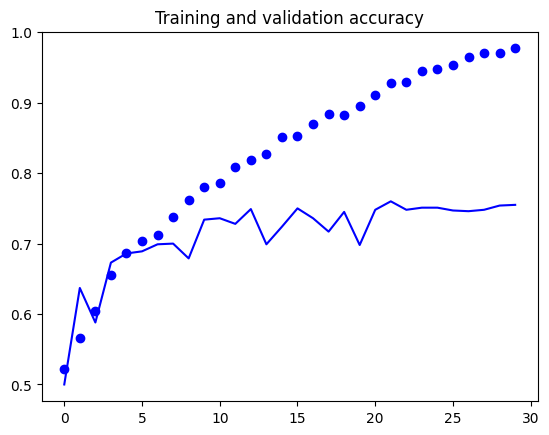

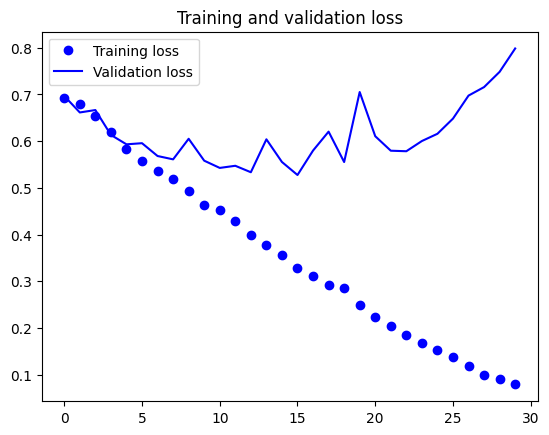

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


Observe que a acurácia dos dados de treinamento aumenta linearmente ao longo do tempo até atingir quase 100% (e validação não passa de 70%).

A validation loss atinge seu mínimo depois de apenas cinco épocas, e a train loss continua diminuindo linearmente até atingir quase 0.

Como temos apenas poucas amostras de treinamento (2000), o maior risco é de overfitting (poderíamos resolver o problema com dropout).

No entanto, usaremos uma técnica muito como para visão computacional que pode solucionar o problema de overfitting: **data augmentation**



Mas, antes de abordarmos o assunto de data augmentation, vamos aprender a realizar algumas predições no nosso modelo treinado.

# Realizando predições
Obtendo uma imagem de exemplo usada no trainamento (veja que esta imagem já está pré-processada)

In [ ]:
data_batch, labels_batch = validation_generator[0]
print('data batch shape:', data_batch.shape)
print(data_batch[5].shape)

x = data_batch[5]

data batch shape: (20, 150, 150, 3)
(150, 150, 3)


Observe o shape da imagem (150, 150, 3), para a predição temos que converter para um tensor 4D

In [ ]:
x = x.reshape(1, 150, 150, 3)
print(x.shape)

(1, 150, 150, 3)


Realizando a inferência: a loss function binary_crossentropy retorna um valor de probabilidade entre 0 e 1 para a classificação binária (cat - 0, dog - 1)

In [ ]:
prob = model.predict(x)
print(prob)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step
[[0.06688409]]


In [ ]:
print(labels_batch[5])

0.0


Abrindo uma imagem diretamente do diretório. Obsserve que agora a imagem não está pre-processada

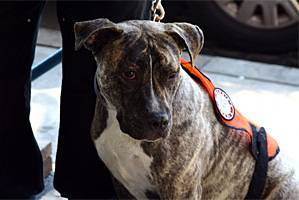

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2

path = os.path.join(base_dir, 'validation/dogs/dog.2010.jpg')
img = cv2.imread(path)
cv2_imshow(img)

In [ ]:
print(img.shape)

(200, 299, 3)


Vamos carregar a imagem usando PIL (biblioteca para processamento de imagens em Python)

In [ ]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from PIL import Image

img = load_img(path, target_size=(150, 150))


Rescale de cada pixel de (0 a 255) para [0, 1]

In [ ]:
from numpy import asarray

img = asarray(img)

print('Data Type: %s' % img.dtype)
print('Min: %.3f, Max: %.3f' % (img.min(), img.max()))

img = img.astype('float32')
img /= 255.0

print('Min: %.3f, Max: %.3f' % (img.min(), img.max()))

Data Type: float32
Min: 0.000, Max: 0.000
Min: 0.000, Max: 0.000


In [ ]:
x = img_to_array(img) # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape) # this is a Numpy array with shape (1, 3, 150, 150)

print(x.shape)

(1, 150, 150, 3)


In [ ]:
prob = model.predict(x)
print(prob)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.11906636]]


# Usando data aubmentation